

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For the following project includes investigating a dataset of appointment records for Brasil public hospitals. The main focus here is to check what factors lead to either patients showing up for appointments or not showing up at all.

Our feature in question is the no_show with yes representing the patient didn't show up for appointment and No that they showed up.


Name          	                                  Description

PatienID :       	        identification of a patient

AppointmentID : 	 	     identification of each appointment

Gender: 	               it says 'F' if female or 'M' if man

ScheduledDay: 	          tells us on what day the patient set up their appointment

AppointmentDay:          the day of the actuall appointment, when they have to visit the doctor

Age: 	                 how old is the patient

Neighbourhood:	         indicates the location of the hospital

Scholarship:  	         indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família

Hipertension: 	         indicates if the patient has hipertension

Diabetes: 	             indicates if the patient has diabetes

Alcoholism:   	         indicates if the patient is an alcoholic

Handcap : 	            indicates if the patient is handicaped

SMS_received:           1 or more messages sent to the patient

No-show	:               it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


In [23]:
#importing necessary libraries
import pandas as pd # for data wrangling
import numpy as np # for numerical calculations
import seaborn as sns# for data visualization
import matplotlib.pyplot as plt# for visualization

%matplotlib inline# To make sure the visualizations are shown in the same space or notebook


UsageError: unrecognized arguments: To make sure the visualizations are shown in the same space or notebook


<a id='wrangling'></a>
## Data Wrangling
Here it involves loading in the data, checking for cleanliness, and then trimming and cleaning the dataset for analysis. 

In [24]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('medical.csv')
#   types and look for instances of missing or possibly errant data.
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


check how the data looks like by assessing the first 5 rows.

### Check the size sample of the dataset

In [25]:
df.shape

(110527, 14)

Checks the number of rows or samples and columns/features that the dataset has.

In [26]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


gives the statistics of how data is distributes i.e measure of central tendacy

### Here check if there is any missing values

In [27]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

As it can be seen our dataset has no null values by each column.

### What are the datatypes for the different features?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information above majority of the features are of integer datatype one float and the others of object which means string

### The scheduled Day datatype is object, for this step it involves changing it to datetime same to the appointment day.

In [29]:
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Scheduleday is the day or date when the patient scheduled appointment the datatype was object(string) which is wrong hence had to change to datetime datatype.

In [30]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

coverted appointment day to datetime

### What is the count for different categories in no_show?

In [31]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

the above results show that 88,208 patients showed up for appointment while the rest did not show up a figure of 22,319

### To bring uniformity the columns are changed to lowercase

In [32]:
df.rename(columns={"No-show": "no_show", "AppointmentDay": "appointment_day"},
errors="raise", inplace=True)


renamed the no_show column and appointment_day column

In [33]:
df.rename(columns={"AppointmentID": "appointment_id"},
errors="raise", inplace=True)

In [34]:
df.columns= df.columns.str.lower()
df.columns

Index(['patientid', 'appointment_id', 'gender', 'scheduledday',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

converted the column names to lowercase for uniformity

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientid        110527 non-null  float64            
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduledday     110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hipertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handcap          110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

In [36]:
df.head()

,patientid,appointment_id,gender,scheduledday,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Initial observations about the dataset 
1. The dataset has 110527 rows and 14 columns
2. There are no nulls in the dataset 
3. Most of the columns are said to have int as their datatypes.
4. The Scheduled day and appointment day is in object type hence should be datatime


> 
### Data Cleaning
There was no much cleaning to be done here in this dataset though I only changed the datatypes for the categorical features.

In [37]:
df['scholarship']=df['scholarship'].astype(str)

The scholarship column has a value of either 1 or 0 which is binary meaning it is not supposed to be of type int converted it to string, so it can be cateorical

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientid        110527 non-null  float64            
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduledday     110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  object             
 8   hipertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handcap          110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

Next cell we use a function to change the type of various categorical variable from int to string

In [39]:
#df['diabetes']=df['diabetes'].astype(str)
#df['alcoholism']=df['alcoholism'].astype(str)
#df['handcap']=df['handcap'].astype(str)
#df['sms_received']=df['sms_received'].astype(str)
car = ['diabetes', 'alcoholism','handcap','sms_received']
def change_type(var):
    df[var]=df[var].astype(str)
    return df.info()
#df['']=df['handcap'].astype(str)

change_type(car)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientid        110527 non-null  float64            
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduledday     110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  object             
 8   hipertension     110527 non-null  int64              
 9   diabetes         110527 non-null  object             
 10  alcoholism       110527 non-null  object             
 11  handcap          110527 non-null  object             
 12  sms_received     110527 non-null  object             
 13 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientid        110527 non-null  float64            
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduledday     110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  object             
 8   hipertension     110527 non-null  int64              
 9   diabetes         110527 non-null  object             
 10  alcoholism       110527 non-null  object             
 11  handcap          110527 non-null  object             
 12  sms_received     110527 non-null  object             
 13 

converted the above columns to type string

In [41]:
#df['hipertension']=df['hipertension'].astype(str)
#change the patient Id into int
df['patientid'] = df['patientid'].astype('int64')

In [42]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.head()

,patientid,appointment_id,gender,scheduledday,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

For this section we do visualizations by investigating features by themselves(Univariate) or investigating relationship between two or more variable(Bivariate or Multivariate)
## What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


### What is the count for the no_show?

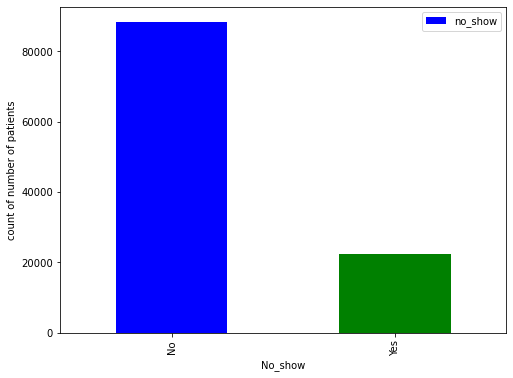

In [43]:

#check how many patients were able to attend the appointments
#we should remeber that 'No' is if the patient shows and  'yes ' if he doesn't
plt.figure(figsize=(8,6))
df['no_show'].value_counts().plot(kind = 'bar',color = ['blue','green'])
plt.xlabel("No_show")
plt.ylabel("count of number of patients")
plt.legend()


As the figure shows a good number of patients showed up for their checkup but the 20000 plus who didn't show up is still a concern 

In [44]:
noo_count = df.query('no_show == "No"')
Yes_count = df.query('no_show == "Yes"')
n_prop = len(noo_count['no_show'])/len(df['no_show'])*100
y_prop = len(Yes_count['no_show'])/len(df['no_show'])*100
print(n_prop)
print(y_prop)

79.8067440534892
20.193255946510806


as to the percentage almost 80% seem to have attended but there is still 20% that didn't bother to attend.

In [45]:
df.columns

Index(['patientid', 'appointment_id', 'gender', 'scheduledday',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [46]:
#To check exactly how people scheduled appointments we must check the day of the week did
#get a new column called day of the week for the appointment
df['appointment_weekday']=df['appointment_day'].dt.day_name()

To explore more want to know which days of the week did patients visit from the appointment date

In [47]:
df['schedule_weekday']=df['scheduledday'].dt.day_name()

In [48]:
df.sample(3)

,patientid,appointment_id,gender,scheduledday,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,schedule_weekday
9924,836432538441695,5737453,F,2016-05-25 09:36:45+00:00,2016-05-31 00:00:00+00:00,66,ROMÃO,0,1,1,0,0,1,No,Tuesday,Wednesday
81198,34741895391997,5691156,F,2016-05-12 11:30:23+00:00,2016-05-30 00:00:00+00:00,22,BONFIM,0,0,0,0,0,1,No,Monday,Thursday
100232,717787814944,5619111,F,2016-04-26 07:42:35+00:00,2016-06-07 00:00:00+00:00,34,TABUAZEIRO,0,0,0,0,0,1,No,Tuesday,Tuesday


from the above sample we can see that new columns have been added one appointment weekday for which dayof the week did the patient get to visit the doctor and schedule weekday representing which day of the week did the patient schedule their patients.

### On which day of the week did people mostly Schedule their appointment?

### what day of the week did they actually get the appointment with the doctor?

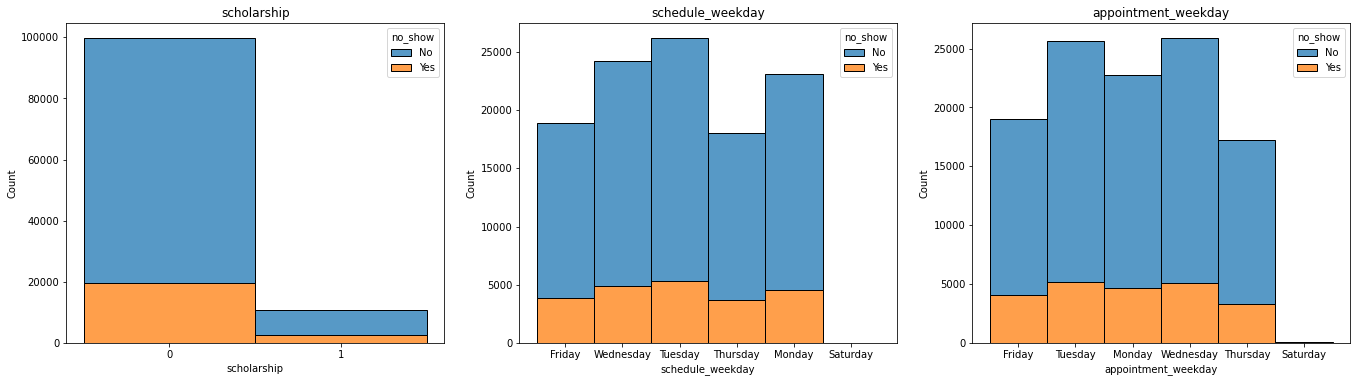

In [49]:
#lets see if as per the given scholarship if they were able to attend their appointment
cat_feat = ['scholarship','schedule_weekday','appointment_weekday']

fig = plt.figure(figsize = (23 ,20))
for i,j in enumerate(cat_feat):
    ax = fig.add_subplot(3, 3, i+1)
    sns.histplot(binwidth=0.5,x = j,hue ="no_show",data =df,multiple = "stack")
    plt.title(j)

> The following were concluded from the above graphs:


* The people given schorlaship i.e health insuarance were encouraged to attend in large numbers though we can see also most didn't enroll for the scholarship.
* It also indicates on saturday there were no schedules made for appointment most patients scheduled their appointments on the first three days of the week.
* The trend is the same for appointment there were no appointments on the weekends and the doctor was busy on weekdays, most people showedup.

### The age Distribution for those who showed up?

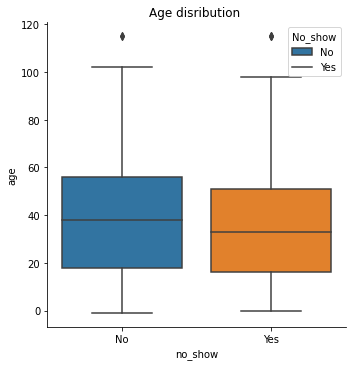

In [50]:
#check the age distribution for either of those showed up or didn't show up
yes = df.query("no_show == 'Yes'")
No = df.query("no_show == 'No'")
#check how they showed up according to age
#df.age['No'].hist(bins = 20,alpha = 0.9)
#df.age[yes].hist(alpha=0.8, bins=20);
#yes
sns.catplot(x="no_show", y="age", data=df, kind= 'box',legend =True)
plt.legend(title='No_show', loc='upper right', labels=['No', 'Yes'])
plt.title("Age disribution ");

The above boxplots represents the age distribution based on how patients showed up for appointment

### how does gender influence the showing up of a patient?

no_show     No    Yes
gender               
F        57246  14594
M        30962   7725


Text(0.5, 1.0, 'Gender')

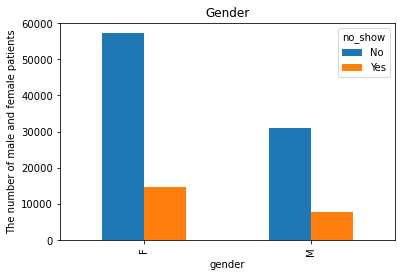

In [51]:
#sns.catplot(x="appointment_day", y="age", hue="no_show", kind="box", data=df)
CrosstabResult=pd.crosstab(index=df['gender'],columns=df['no_show'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
#%matplotlib inline # only needed for jupyter notebook
#plt.figure(figsize = (3,7))
CrosstabResult.plot.bar()
plt.ylabel("The number of male and female patients")
plt.title("Gender")

The patients who made appointments or showed up were mostly female

Text(0, 0.5, 'Count')

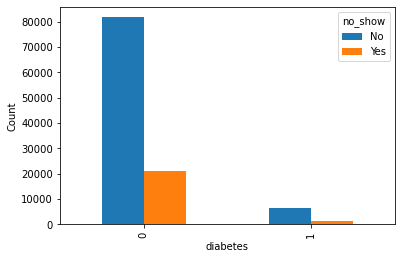

In [52]:
cross_tab_diabetes = pd.crosstab(index=df['diabetes'],columns = df['no_show'])
cross_tab_diabetes.plot.bar()
plt.ylabel("Count")

In [53]:
len(df['neighbourhood'].value_counts())

81

There are 81 different neighbourhoods that the patients come from.

### for  all categorical variables in the dataset I plotted them.

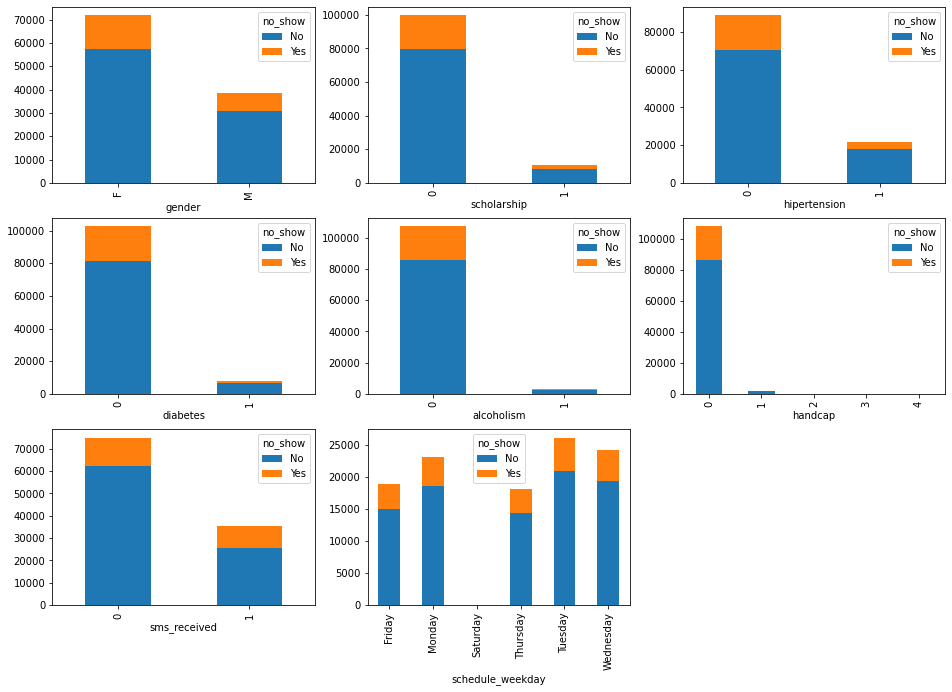

In [54]:
#for all categorical variables will create a cross tab

cat_var = ['gender','scholarship','hipertension','diabetes','alcoholism','handcap','sms_received','schedule_weekday']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(cat_var):
    #ax = fig.add_subplot(3, 3, i+1)
     ax = fig.add_subplot(3, 3, i+1)
     df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)

    

A patient schedules a certain day but get appointment day with the doctor some day late.Let's check if the delay has effect

In [55]:
# a patient schedules a certain day but get appointment day with the doctor some day late.Let's check if the delay has effect
app = pd.to_datetime(df['appointment_day']).dt.date
app

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
             ...    
110522    2016-06-07
110523    2016-06-07
110524    2016-06-07
110525    2016-06-07
110526    2016-06-07
Name: appointment_day, Length: 110527, dtype: object

In [56]:
shed  = pd.to_datetime(df['scheduledday']).dt.date
shed

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
             ...    
110522    2016-05-03
110523    2016-05-03
110524    2016-04-27
110525    2016-04-27
110526    2016-04-27
Name: scheduledday, Length: 110527, dtype: object

In [57]:
df['wait'] = shed - app

In [58]:
df['wait'] = abs(df['wait'])
df.sample()

,patientid,appointment_id,gender,scheduledday,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,schedule_weekday,wait
70694,21663672586876,5693060,M,2016-05-12 17:25:10+00:00,2016-05-30 00:00:00+00:00,64,SANTA LÚCIA,0,0,0,0,0,1,No,Monday,Thursday,18 days


A new column called wait is added to the dataset, patients scheduled appointments on certain days but their appointments with the doctor was either on same day or later day hence new column.

In [59]:
df.sample(6)

,patientid,appointment_id,gender,scheduledday,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,schedule_weekday,wait
93403,883221361645194,5758952,M,2016-06-01 11:27:51+00:00,2016-06-01 00:00:00+00:00,13,REDENÇÃO,0,0,0,0,0,0,No,Wednesday,Wednesday,0 days
247,22357227114,5489434,F,2016-03-18 13:01:08+00:00,2016-04-29 00:00:00+00:00,57,CARATOÍRA,0,0,0,0,0,0,Yes,Friday,Friday,42 days
29794,8238963771951,5731322,M,2016-05-24 09:51:21+00:00,2016-05-24 00:00:00+00:00,7,SANTO ANTÔNIO,0,0,0,0,0,0,No,Tuesday,Tuesday,0 days
91705,297859267999657,5711276,F,2016-05-18 07:26:59+00:00,2016-06-03 00:00:00+00:00,53,BONFIM,0,0,0,0,0,1,Yes,Friday,Wednesday,16 days
41882,798964552472145,5674323,M,2016-05-09 10:50:17+00:00,2016-05-17 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Tuesday,Monday,8 days
82791,3658954921742,5707684,F,2016-05-17 09:57:11+00:00,2016-05-20 00:00:00+00:00,3,SANTA MARTHA,1,0,0,0,0,0,No,Friday,Tuesday,3 days


### What neighbourhood was most of the patients from?

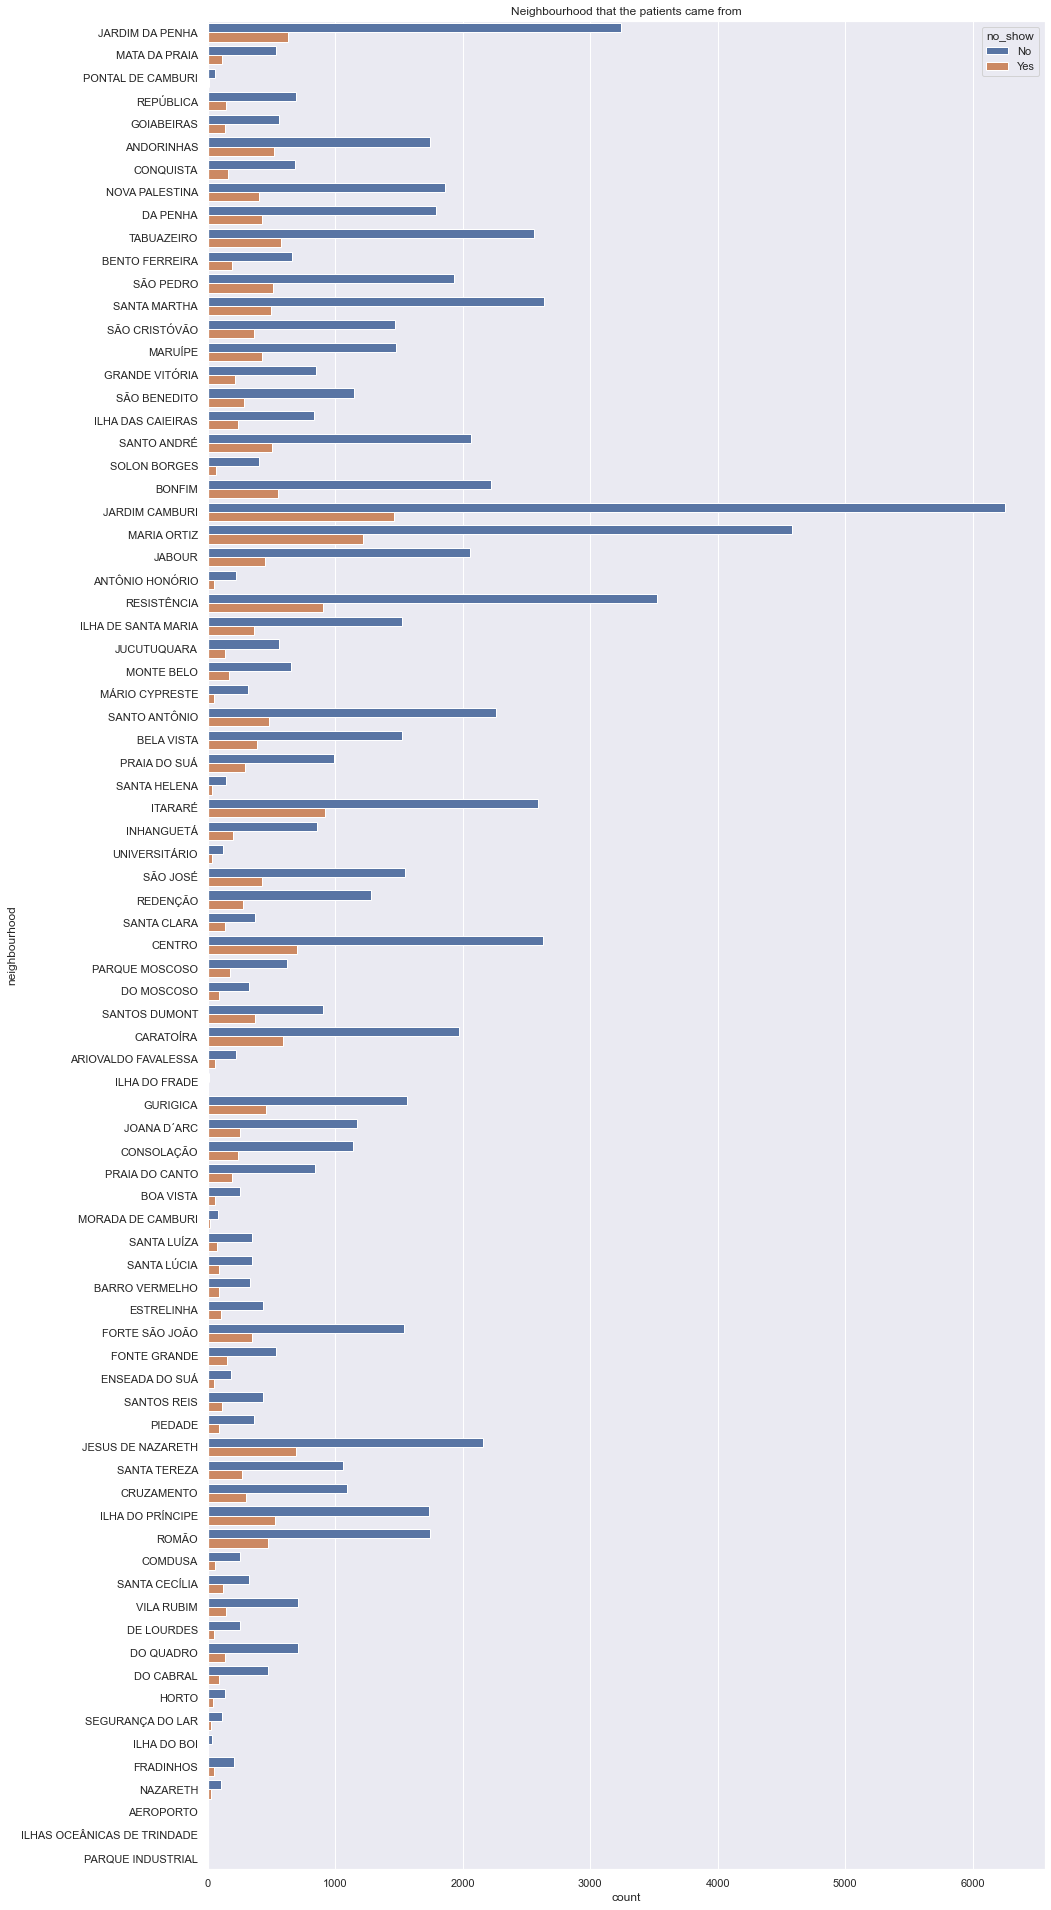

In [60]:
#fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(15,34)})
#sns.countplot(y='neighbourhood',data=df,hue = 'no_show')
#sns.set(style="darkgrid")
ax = sns.countplot(y='neighbourhood', hue="no_show", data=df)
plt.title("Neighbourhood that the patients came from")
plt.show()
#plt.title("Count of Passengers that Embarked in Each City")

Most of the patients came from Jardim Camburi neighbourhood seems that we've got neighbourhoods that no patients came from there

Text(0, 0.5, 'Count')

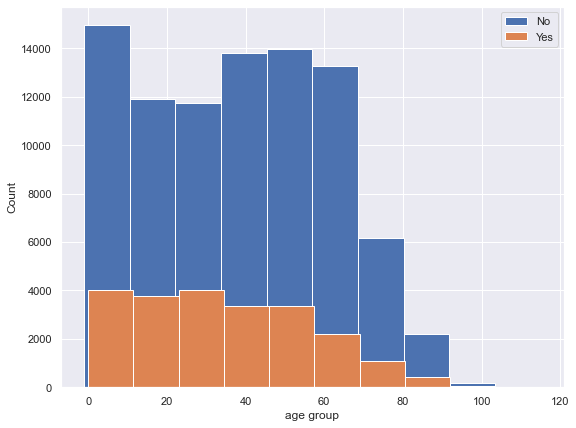

In [61]:
#check the age affected
plt.figure(figsize = (9,7))
df.groupby('no_show')['age'].plot(kind='hist',legend = True)
plt.xlabel("age group")
plt.ylabel("Count")
#sns.histplot(df, x="age",hue ='scholarship')

our age group indicates most patient were childen of the age below 10,  then the middle age people and then the youths finally the old age. patients from with the age of months to above 100 were represented here.

<a id='conclusions'></a>
## Conclusions
While investigating the medical no show dataset i drew the following conclusions:
1. 80% of the patients showed up for the check up while the 20% did't show up, which is good.
2. people with scholarship tend to attend the appointments than those without this means the Brasilian government should consider giving more people schoraship advantage.
3. The hospital gave appointments on weekdays only then the doctor mostly had alot of people on Tuesdays and Thursdays.
4. Most of the females showed up for appointment and it also seems that the hospital recieves female cleints.
5. Most patients are not diabetic
6. The patients are more diabetic than being alcoholics
7. The average age of th e patients is 37 years, 25% are less than 18 year the youngest person is less than a yearwhile the eldest is 115 years.
8. The old age patients proved to be showing up for appointments in full numbers.
9. Jardim Camburi is where most of the patients came from.
10. Some patients were lucky that the day they had scheduled their appointments they actually got the opportunity to get appointments that same day.
11. Despite the delays of the appointment by the doctor most of them actually showed up



12. Due to the fact that the data was mostly categorical there was limited representations i could do since our target variable was also categorical.
13. For some features it is not clearly indicated if 0 represent the poasitive side while 1 negative and viceversa.
14. There are more complex ways to determine the factors that are important to predict if a patient showed up or not which are out of scope for this investigation.